import Importing neede libraries for preprocessing and model budiling 



In [2]:
import nltk
import io
import re
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
!pip install googletrans==3.1.0a0
from googletrans import Translator, constants
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 1.0MB 7.5MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 61kB 3.7MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=233aa21a34d7713646ef534a6b0251b5c2359163be6f57d90f9bad6037a1a1be
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [3]:
#import of stnadarod data set 
# this code was seperated from the main import blcok because it takes so long to run 
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-04-28 00:03:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-28 00:03:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-28 00:03:12--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

read in dataset and look at it 

In [49]:
# this mehtod of reading in text works better for full text files 
# other method to read in articles 
txt = "/content/ChristopherNolan.txt"

# opening and converting read in files to use able form 
txt = open(txt, "r")
text_sring = txt.read()
print(type(text_sring))
print(text_sring)


<class 'str'>
LOS ANGELES—Visibly exhausted from his hours-long binge, Christopher Nolan was reportedly still no closer to understanding the end of Tenet Tuesday after watching dozens of YouTube explainer videos. “Wait, so what the hell was that turnstile thingy?” said Nolan, pausing a 35-minute long video and rubbing his eyes as he compared the elaborate diagram on screen to the copy he had scrawled down on a napkin in front of him. “It’s like some kind of time machine? That lets the nameless man run backward? And Robert Pattinson is a little boy? Either I’m stupid, or this plot makes no sense. I’ve watched, like, nine videos on the temporal pincer alone, and I still can’t make heads or tails of it. Jesus Christ, this is so convoluted. It’s almost worse than Inception.” At press time, Nolan admitted that The Prestige was the last one of his movies that he had really understood.


In [50]:
# remove punctuations, numbers and special characters
sentences = text_sring.split('.') 
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")
clean_sentences = [s.lower() for s in clean_sentences]

#remove stopwords from the sentences
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]
print(clean_sentences)

['los angeles visibly exhausted hours long binge christopher nolan reportedly still closer understanding end tenet tuesday watching dozens youtube explainer videos', 'wait hell turnstile thingy said nolan pausing minute long video rubbing eyes compared elaborate diagram screen copy scrawled napkin front', 'like kind time machine lets nameless man run backward robert pattinson little boy either stupid plot makes sense', 'watched like nine videos temporal pincer alone still make heads tails', 'jesus christ convoluted', 'almost worse inception', 'press time nolan admitted prestige last one movies really understood', '']


In [51]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [31]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [32]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j: #ignore if both are same sentences
        sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [48]:
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)


clound_sentences = " " 
cosine_scores = []
print("the total number of sentences is", len(sentences))
print("the total number of sentences is", len(ranked_sentences))

# Extract top n sentences 
for i in range(len(ranked_sentences)):
  print("--------------")
  print("ranked senctence number", i)
  print(ranked_sentences[i][0])
  print("cosine score" , ranked_sentences[i])
  clound_sentences += ranked_sentences[i][1]
  


the total number of sentences is 8
the total number of sentences is 8
--------------
ranked senctence number 0
0.1541469628615092
cosine score (0.1541469628615092, '” At press time, Nolan admitted that The Prestige was the last one of his movies that he had really understood')
--------------
ranked senctence number 1
0.15313246087806176
cosine score (0.15313246087806176, ' “It’s like some kind of time machine? That lets the nameless man run backward? And Robert Pattinson is a little boy? Either I’m stupid, or this plot makes no sense')
--------------
ranked senctence number 2
0.15209210466534517
cosine score (0.15209210466534517, ' I’ve watched, like, nine videos on the temporal pincer alone, and I still can’t make heads or tails of it')
--------------
ranked senctence number 3
0.14813932093229276
cosine score (0.14813932093229276, 'LOS ANGELES—Visibly exhausted from his hours-long binge, Christopher Nolan was reportedly still no closer to understanding the end of Tenet Tuesday after w

(-0.5, 399.5, 199.5, -0.5)

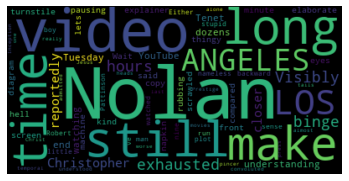

In [39]:
# word clounds for original text 
wordCloud = WordCloud().generate(text_sring)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

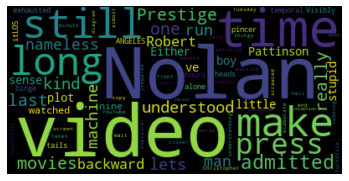

In [40]:
# clound for ranked sentences 
wordCloud = WordCloud().generate(clound_sentences)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis("off")

In [41]:
translator = Translator() #Google API translator
#Translates automatically from spanish to english, to translate differentlanguage, 
#translator.translate("Phrase", dest = "language code")

translation = translator.translate(clound_sentences, dest = "fr")
print(f"{translation.origin} ({translation.src}) --> {translation.text}({translation.dest})")

 ” At press time, Nolan admitted that The Prestige was the last one of his movies that he had really understood “It’s like some kind of time machine? That lets the nameless man run backward? And Robert Pattinson is a little boy? Either I’m stupid, or this plot makes no sense I’ve watched, like, nine videos on the temporal pincer alone, and I still can’t make heads or tails of itLOS ANGELES—Visibly exhausted from his hours-long binge, Christopher Nolan was reportedly still no closer to understanding the end of Tenet Tuesday after watching dozens of YouTube explainer videos “Wait, so what the hell was that turnstile thingy?” said Nolan, pausing a 35-minute long video and rubbing his eyes as he compared the elaborate diagram on screen to the copy he had scrawled down on a napkin in front of him It’s almost worse than Inception Jesus Christ, this is so convoluted (en) --> "Au moment de mettre sous presse, Nolan a admis que Le Prestige était le dernier de ses films qu'il avait vraiment comp

In [44]:
# looks like the tuples includes the simmularity score 
print(type(ranked_sentences))
print(len(ranked_sentences))
print(type(ranked_sentences[1]))
print(ranked_sentences[6])

<class 'list'>
8
<class 'tuple'>
(0.09368962828082891, ' Jesus Christ, this is so convoluted')
